<a href="https://colab.research.google.com/github/Mounish2023/fastaicourse/blob/main/MultiLabelClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

# Preparig a dataset for training the model

In [2]:
path = untar_data(URLs.PASCAL_2007)

In [3]:
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/segmentation')]

In [16]:
(path/'/root/.fastai/data/pascal_2007/train').ls()

(#5012) [Path('/root/.fastai/data/pascal_2007/train/006185.jpg'),Path('/root/.fastai/data/pascal_2007/train/000153.jpg'),Path('/root/.fastai/data/pascal_2007/train/004625.jpg'),Path('/root/.fastai/data/pascal_2007/train/008886.jpg'),Path('/root/.fastai/data/pascal_2007/train/004149.jpg'),Path('/root/.fastai/data/pascal_2007/train/002004.jpg'),Path('/root/.fastai/data/pascal_2007/train/003758.jpg'),Path('/root/.fastai/data/pascal_2007/train/007230.jpg'),Path('/root/.fastai/data/pascal_2007/train/005874.jpg'),Path('/root/.fastai/data/pascal_2007/train/002015.jpg'),Path('/root/.fastai/data/pascal_2007/train/000460.jpg'),Path('/root/.fastai/data/pascal_2007/train/003717.jpg'),Path('/root/.fastai/data/pascal_2007/train/007389.jpg'),Path('/root/.fastai/data/pascal_2007/train/005674.jpg'),Path('/root/.fastai/data/pascal_2007/train/008822.jpg'),Path('/root/.fastai/data/pascal_2007/train/001832.jpg'),Path('/root/.fastai/data/pascal_2007/train/006163.jpg'),Path('/root/.fastai/data/pascal_2007/tr

In [5]:
import pandas as pd
df = pd.read_csv( (path/'/root/.fastai/data/pascal_2007/train.csv'))


In [32]:
def get_x(df): return path/'/root/.fastai/data/pascal_2007/train'/df['fname']
def get_y(df): return df['labels'].split(' ')

def splitter(df):
  train = df.index[~df['is_valid']].to_list()
  valid = df.index[df['is_valid']].to_list()
  return train, valid

In [33]:
# train, valid = splitter(df)
# train.tail(5)

In [35]:
dblock = DataBlock( blocks = (ImageBlock, MultiCategoryBlock),
                    get_x=get_x,
                   get_y=get_y,
                    item_tfms=RandomResizedCrop(128, min_scale=0.35),
                    splitter = splitter
                    )

In [43]:
dsets = dblock.datasets(df)

In [56]:
len(dsets.train), len(dsets.valid)

(2501, 2510)

In [44]:
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
                      0., 0., 0., 0., 0.]))

In [58]:
L(dsets.train.vocab)

(#20) ['aeroplane','bicycle','bird','boat','bottle','bus','car','cat','chair','cow','diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train','tvmonitor']

In [46]:
indxs = dsets.train[0][1]==1.

In [47]:
dsets.train.vocab[indxs]

(#1) ['car']

In [48]:
dls = dblock.dataloaders(df)

In [52]:
len(dls.train), len(dls.valid)

(39, 40)

In [53]:
dls.bs

64

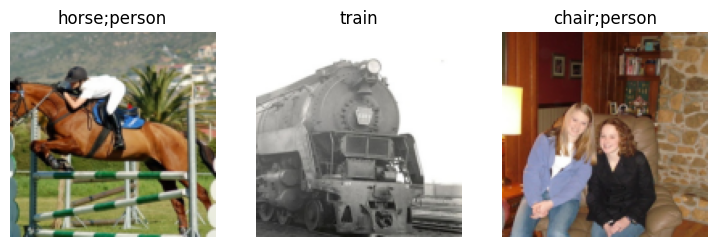

In [55]:
dls.show_batch(nrows=1, ncols=3)

# Model Training

In [57]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 46.8MB/s]


epoch,train_loss,valid_loss,error_rate,time


AssertionError: Exception occured in `Recorder` when calling event `after_batch`:
	==:
64
1280

In [59]:
x,y = dls.train.one_batch()

In [60]:
activs = learn.model(x)

In [61]:
activs.shape

torch.Size([64, 20])